# Exploratory Data Analysis

![image](https://github.com/user-attachments/assets/346427ef-11e6-4333-ad64-2ffd711eabd0)

Exploratory Data Analysis (EDA) is a method of analyzing datasets to understand their main characteristics. It involves summarizing data features, detecting patterns, and uncovering relationships through visual and statistical techniques. EDA helps in gaining insights and formulating hypotheses for further analysis.

# Dataset Description

The dataset provides information about used cars, including their specifications, usage, and pricing. Below is the description of each column:

| Column Name          | Description                                                                                  |
|-----------------------|----------------------------------------------------------------------------------------------|
| **S.No.**            | A unique identifier for each record in the dataset.                                          |
| **Name**             | The name or model of the car, including the brand and specific variant.                      |
| **Location**         | The city where the car is available for sale.                                                |
| **Year**             | The manufacturing year of the car. Indicates the car's age.                                  |
| **Kilometers_Driven**| The total distance the car has been driven, measured in kilometers.                           |
| **Fuel_Type**        | The type of fuel the car uses, such as Petrol, Diesel, CNG, or Electric.                     |
| **Transmission**     | The type of transmission system: Manual or Automatic.                                        |
| **Owner_Type**       | The ownership status of the car, e.g., First Owner, Second Owner, etc.                       |
| **Mileage**          | The fuel efficiency of the car in kilometers per liter or kilometers per kilogram (for CNG). |
| **Engine**           | The engine displacement of the car, measured in cubic centimeters (CC).                      |
| **Power**            | The maximum power output of the car, measured in brake horsepower (BHP).                     |
| **Seats**            | The number of seats available in the car.                                                    |
| **New_Price**        | The original price of the car when it was new (if available).                                 |
| **Price**            | The current selling price of the car in the market.                                          |



In [4]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('used_cars_data.csv')

In [6]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### Data Understanding

In [8]:
df.shape

(7253, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [10]:
#missing values
df.isna().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [11]:
# percentage of the missing value
((df.isna().sum().sort_values(ascending=False)) / len(df)) * 100

New_Price            86.129877
Price                17.013650
Seats                 0.730732
Engine                0.634220
Power                 0.634220
Mileage               0.027575
S.No.                 0.000000
Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
dtype: float64

In [12]:
# duplicate data
df.duplicated().sum()

0

##### Look at the data

In [14]:
df.Mileage

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7253, dtype: object

In [15]:
df['Mileage'] = df.Mileage.str.extract(r'(\d+\.\d+)')

In [16]:
df.Mileage

0        26.6
1       19.67
2        18.2
3       20.77
4        15.2
        ...  
7248    20.54
7249    17.21
7250    23.08
7251     17.2
7252     10.0
Name: Mileage, Length: 7253, dtype: object

In [17]:
# Engine
df.Engine

0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
7248    1598 CC
7249    1197 CC
7250    1461 CC
7251    1197 CC
7252    2148 CC
Name: Engine, Length: 7253, dtype: object

In [18]:
df['Engine'] = df['Engine'].str.replace('CC', '')

In [19]:
df.Engine

0        998 
1       1582 
2       1199 
3       1248 
4       1968 
        ...  
7248    1598 
7249    1197 
7250    1461 
7251    1197 
7252    2148 
Name: Engine, Length: 7253, dtype: object

In [20]:
# Power
df.Power

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
7248    103.6 bhp
7249    103.6 bhp
7250     63.1 bhp
7251    103.6 bhp
7252      170 bhp
Name: Power, Length: 7253, dtype: object

In [21]:
df['Power'] = df['Power'].str.extract(r'(\d+\.\d+)')

In [22]:
df.Power

0       58.16
1       126.2
2        88.7
3       88.76
4       140.8
        ...  
7248    103.6
7249    103.6
7250     63.1
7251    103.6
7252      NaN
Name: Power, Length: 7253, dtype: object

In [23]:
# New_Price
df.New_Price.unique()

array([nan, '8.61 Lakh', '21 Lakh', '10.65 Lakh', '32.01 Lakh',
       '47.87 Lakh', '10.57 Lakh', '12.33 Lakh', '11.12 Lakh',
       '23.64 Lakh', '18.64 Lakh', '19.34 Lakh', '49.14 Lakh',
       '11.81 Lakh', '16.65 Lakh', '6.67 Lakh', '6.45 Lakh', '6.41 Lakh',
       '27 Lakh', '5.13 Lakh', '54.43 Lakh', '9.51 Lakh', '9.96 Lakh',
       '14.44 Lakh', '4.53 Lakh', '95.04 Lakh', '13.49 Lakh', '1.28 Cr',
       '60.88 Lakh', '7.39 Lakh', '69.47 Lakh', '8.78 Lakh', '12.74 Lakh',
       '10.52 Lakh', '11.98 Lakh', '8.54 Lakh', '33.58 Lakh', '9.12 Lakh',
       '5.29 Lakh', '44.28 Lakh', '20.74 Lakh', '11.74 Lakh',
       '25.52 Lakh', '14.07 Lakh', '95.13 Lakh', '8.34 Lakh', '8.85 Lakh',
       '25.4 Lakh', '16.67 Lakh', '79.43 Lakh', '6.62 Lakh', '1.04 Cr',
       '58.67 Lakh', '28.37 Lakh', '4.48 Lakh', '72.64 Lakh',
       '36.15 Lakh', '44.59 Lakh', '12 Lakh', '14.65 Lakh', '53.72 Lakh',
       '33.91 Lakh', '12.51 Lakh', '9.74 Lakh', '95.38 Lakh',
       '60.59 Lakh', '11.28 Lakh', 

In [24]:
df.New_Price = df.New_Price.str.extract(r'(\d+\.\d+)')

In [25]:
df.New_Price

0        NaN
1        NaN
2       8.61
3        NaN
4        NaN
        ... 
7248     NaN
7249     NaN
7250     NaN
7251     NaN
7252     NaN
Name: New_Price, Length: 7253, dtype: object

In [26]:
# Convert the data type
df.Mileage = df.Mileage.astype(float)
df.Engine = df.Engine.astype(float)
df.Power = df.Power.astype(float)
df.New_Price = df.New_Price.astype(float)

In [27]:
df.dtypes

S.No.                  int64
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
New_Price            float64
Price                float64
dtype: object

In [28]:
df.Seats.unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

#### Feature Engineering
Feature engineering refers to the process of using domain knowledge to select and transform the most relevant variables from raw data when creating a predictive model using machine learning or statistical modeling. The main goal of feature engineering is to create meaningful data from raw data.


In [30]:
from datetime import date

current_year = date.today().year
current_year

2025

In [31]:
# Create a Car_Age Feature
df['Car_Age'] = current_year - df.Year

In [32]:
# Create Brand and Model from car's name

df['Brand'] = df['Name'].str.split().str.get(0)
df['Model'] = df['Name'].str.split().str.get(1) + ' ' + df['Name'].str.split().str.get(2)

In [33]:
df.head(2)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age,Brand,Model
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75,15,Maruti,Wagon R
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50,10,Hyundai,Creta 1.6


In [34]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [35]:
df.Brand.replace({
    'ISUZU':'Isuzu',
    'Mini':'Mini Cooper',
    'Land': 'Land Roover'
}, inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_16656\3024622615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Brand.replace({


In [36]:
df.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land Roover', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini Cooper', 'Fiat',
       'Jeep', 'Smart', 'Ambassador', 'Isuzu', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

In [37]:
df.Model.unique()

array(['Wagon R', 'Creta 1.6', 'Jazz V', 'Ertiga VDI', 'A4 New',
       'EON LPG', 'Micra Diesel', 'Innova Crysta', 'Vento Diesel',
       'Indica Vista', 'Ciaz Zeta', 'City 1.5', 'Swift VDI',
       'Rover Range', 'Rover Freelander', 'Pajero Sport', 'Amaze S',
       'Swift DDiS', 'Duster 85PS', 'New C-Class', '3 Series', 'S Cross',
       'A6 2011-2015', 'i20 1.2', 'Vento Petrol', 'City Corporate',
       'Alto K10', 'WRV i-VTEC', 'Innova 2.5', 'Duster 110PS',
       'Corolla Altis', 'Ssangyong Rexton', 'A6 2.7', 'Vento 1.6',
       'Vitara Brezza', 'KUV 100', 'M-Class ML', 'Polo Diesel',
       'Alto LXi', 'Nano LX', 'i20 Magna', 'Elantra 2.0', 'Elantra CRDi',
       'Xcent 1.1', 'Thar CRDe', 'A4 2.0', 'Swift LDI', 'Swift Ldi',
       'Grand i10', 'Vento 2013-2015', 'KWID RXT', 'i10 Asta',
       'X-Trail SLX', 'Zen Estilo', 'Figo Diesel', 'Indica V2', 'City ZX',
       'C-Class Progressive', 'Ertiga SHVS', 'Creta 1.4',
       'Cayenne 2009-2014', 'XUV500 W8', 'i10 Sportz', 'Terrano

In [38]:
df['Final_Price'] = np.where(df['Price'].isna(), df['New_Price'], df['Price'])

In [39]:
# Drop unnecessary columns
df = df.drop(['S.No.', 'Name', 'New_Price', 'Price'], axis=1)

In [40]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Brand,Model,Final_Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,15,Maruti,Wagon R,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,10,Hyundai,Creta 1.6,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,14,Honda,Jazz V,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,13,Maruti,Ertiga VDI,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,12,Audi,A4 New,17.74


In [41]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.0000,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.0000,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.1000,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.0000,5998.00
Power,4464.0,106.266843,46.408887,34.20,78.90,88.80,121.3600,488.10
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.0000,10.00
Car_Age,7253.0,11.634634,3.254421,6.00,9.00,11.00,14.0000,29.00
Final_Price,6198.0,9.721417,11.525143,0.44,3.50,5.75,10.3075,160.00


#### Data Visualization

In [43]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Car_Age                int64
Brand                 object
Model                 object
Final_Price          float64
dtype: object

In [44]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(include=np.number).columns

In [45]:
print(cat_col)
print(num_col)

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Car_Age', 'Final_Price'],
      dtype='object')


##### Univariate

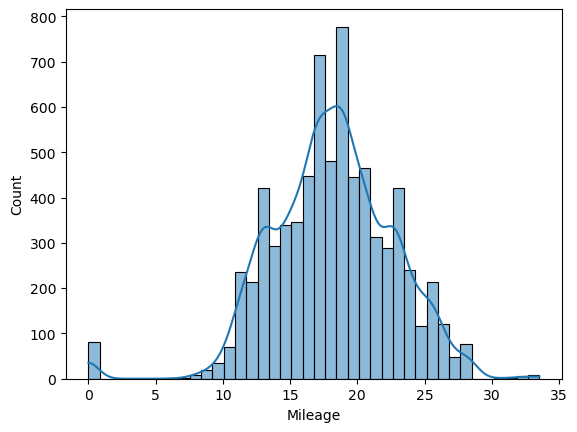

In [47]:
sns.histplot(df['Mileage'], kde=True, bins=40)
plt.show()

Year : skew = -0.8398161508976376
Kilometers_Driven : skew = 61.582574656174806
Mileage : skew = -0.4383205657235177
Engine : skew = 1.4124125381446186
Power : skew = 1.8475821836813315
Seats : skew = 1.9022619640428065
Car_Age : skew = 0.8398161508976897
Final_Price : skew = 3.2786499553695543


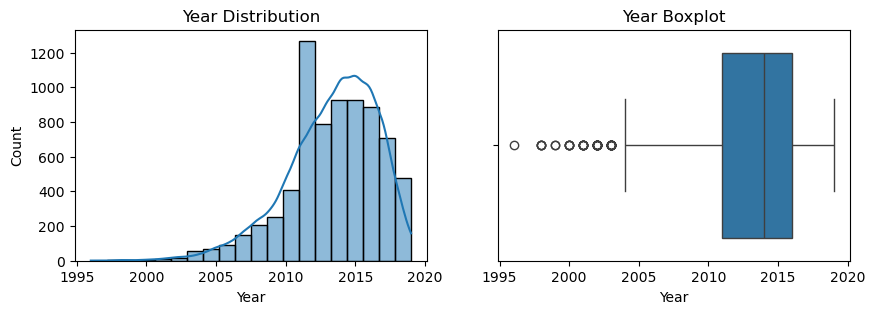

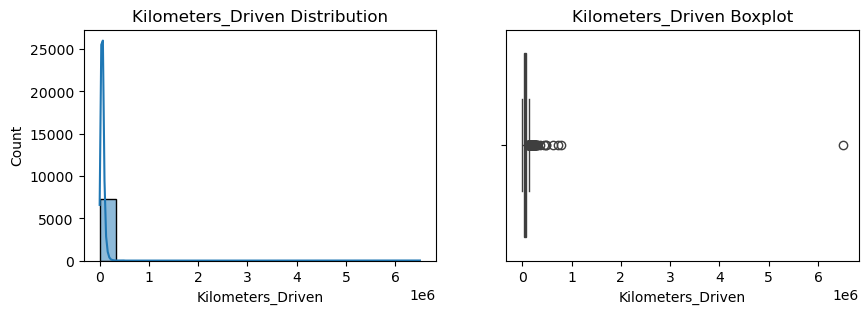

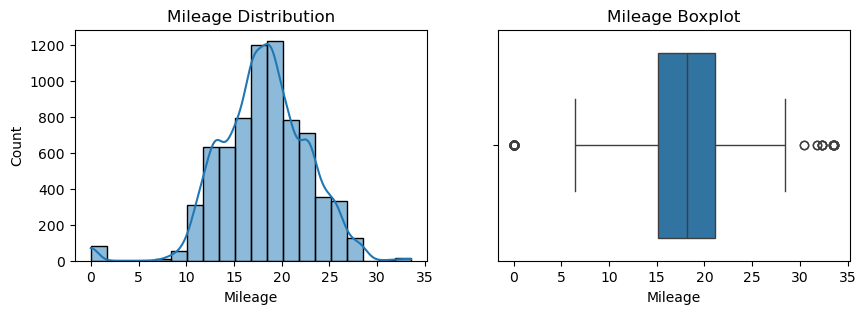

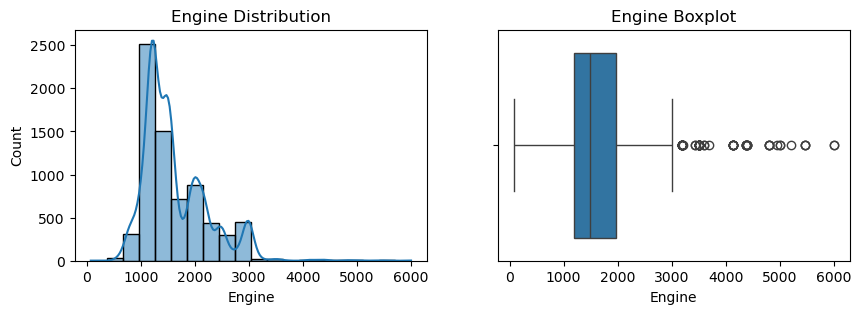

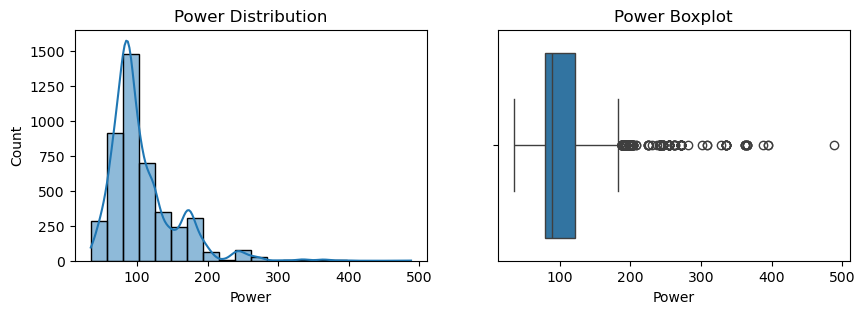

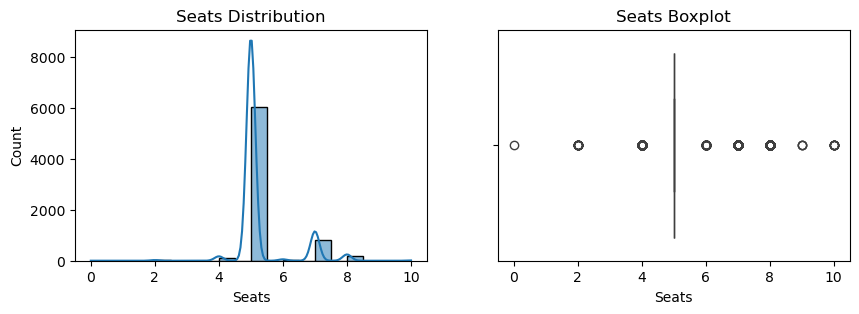

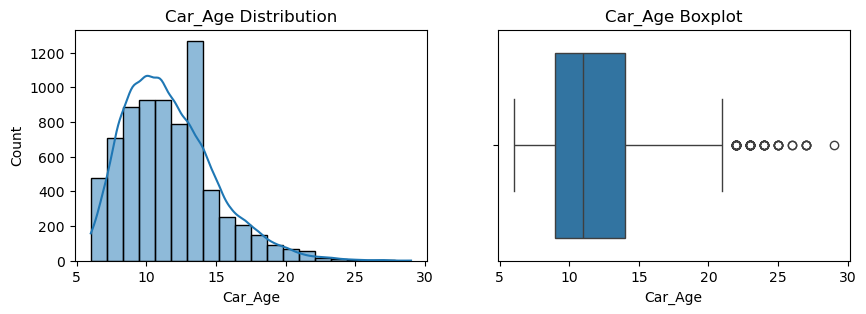

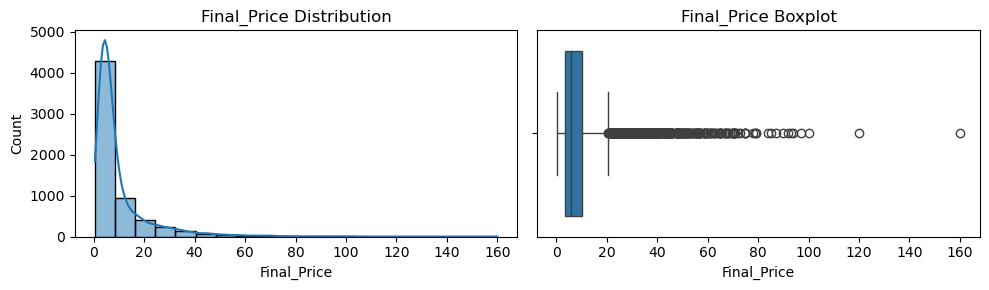

In [48]:
# Loop through the numerical columns
for col in num_col:
    skewness = df[col].skew()
    print(f'{col} : skew = {skewness}')
    plt.figure(figsize=(10, 3))
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'{col} Distribution')
    plt.xlabel(col)
    plt.ylabel('Count')

    # Box Plot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'{col} Boxplot')
    plt.xlabel(col)

plt.tight_layout()
plt.show()
    

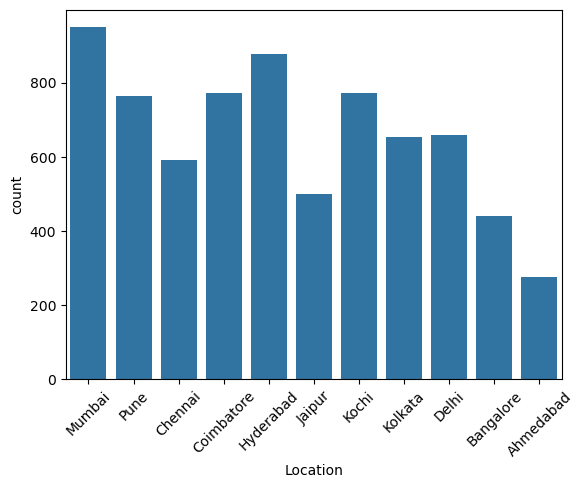

In [125]:
# categorical columns
sns.countplot(data=df, x='Location')
plt.xticks(rotation=45)
plt.show()

In [50]:
cat_col

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')

In [137]:
df['Model'].value_counts().head(10).index

Index(['Swift Dzire', 'Grand i10', 'Wagon R', 'Innova 2.5', 'Verna 1.6',
       'City 1.5', 'City i', 'Creta 1.6', 'New C-Class', '3 Series'],
      dtype='object', name='Model')

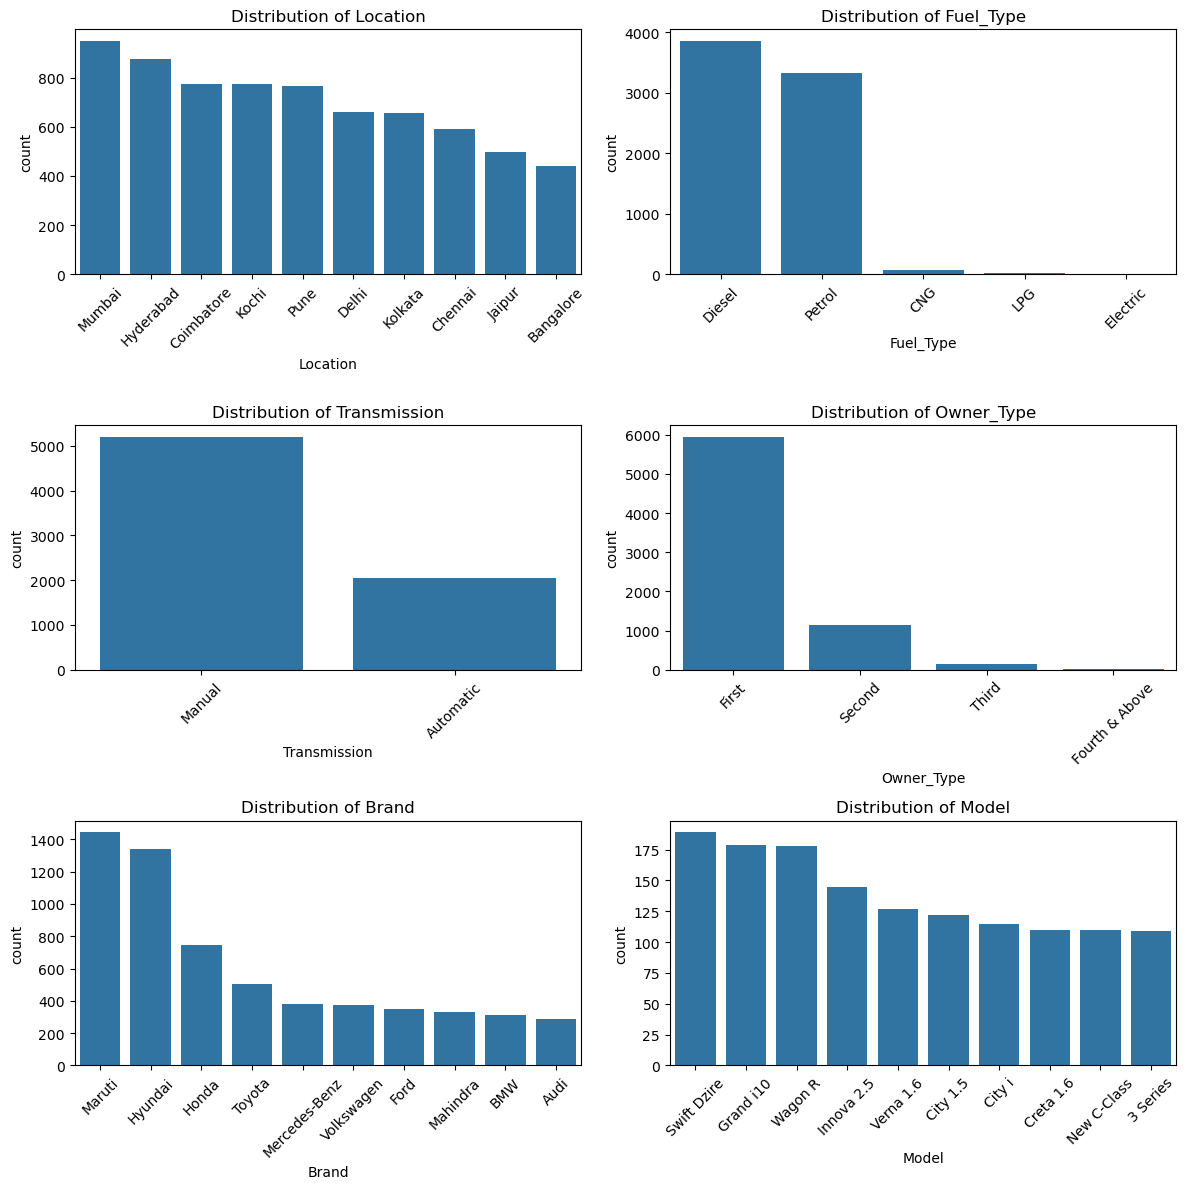

In [139]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
for i, col in enumerate(cat_col):
    ax = axes[i//2, i%2]
    sns.countplot(ax=ax, data=df, x=col, order=df[col].value_counts().head(10).index)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
    

## Bivariate Analysis

In [146]:
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Car_Age']

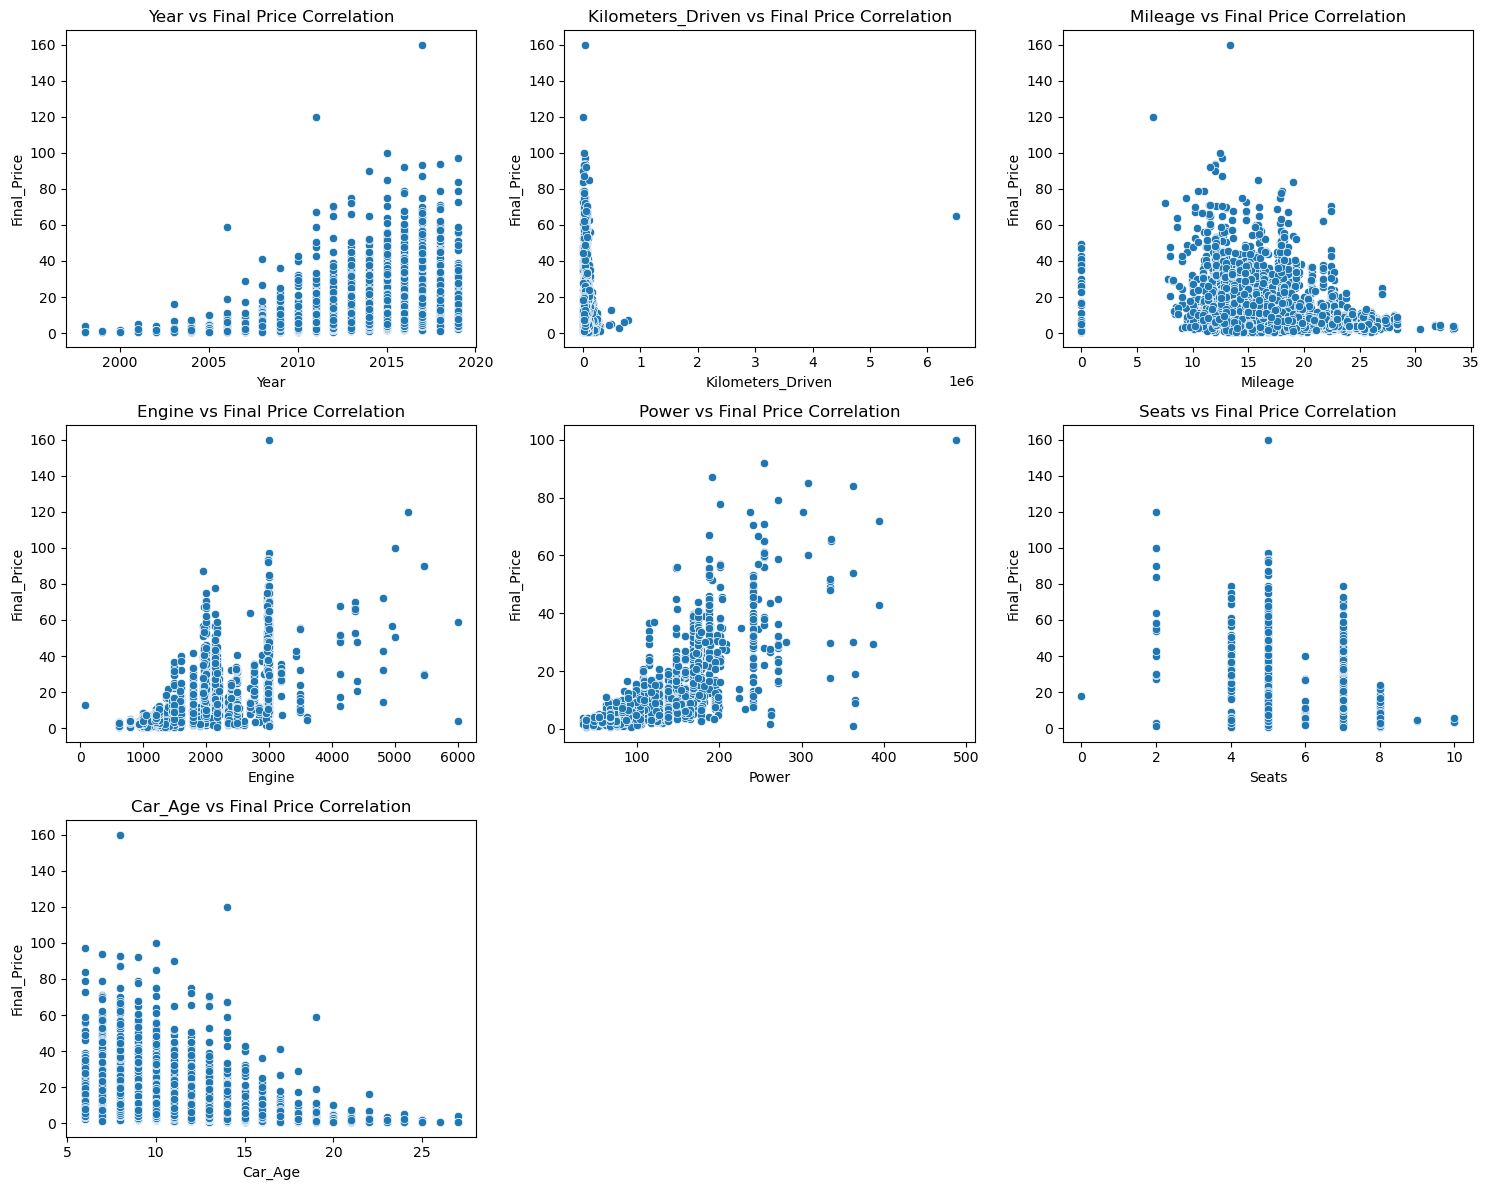

In [150]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axis = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.scatterplot(data=df, x=col, y='Final_Price', ax=axis[i])
    axis[i].set_title(f'{col} vs Final Price Correlation')

for ax in range(len(numerical_columns), len(axis)):
    fig.delaxes(axis[ax])

plt.tight_layout()
plt.show()    

In [154]:
# correlation matrix
corr_matrix = df[num_col].corr()
corr_matrix

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Final_Price
Year,1.000000,-0.187859,0.322463,-0.054693,0.018554,0.008216,-1.000000,0.303080
Kilometers_Driven,-0.187859,1.000000,-0.069122,0.094818,0.037657,0.090221,0.187859,-0.014416
Mileage,0.322463,-0.069122,1.000000,-0.593569,-0.601432,-0.310632,-0.322463,-0.299896
Engine,-0.054693,0.094818,-0.593569,1.000000,0.879951,0.399262,0.054693,0.640317
Power,0.018554,0.037657,-0.601432,0.879951,1.000000,0.181943,-0.018554,0.765694
Seats,0.008216,0.090221,-0.310632,0.399262,0.181943,1.000000,-0.008216,0.052785
Car_Age,-1.000000,0.187859,-0.322463,0.054693,-0.018554,-0.008216,1.000000,-0.303080
Final_Price,0.303080,-0.014416,-0.299896,0.640317,0.765694,0.052785,-0.303080,1.000000


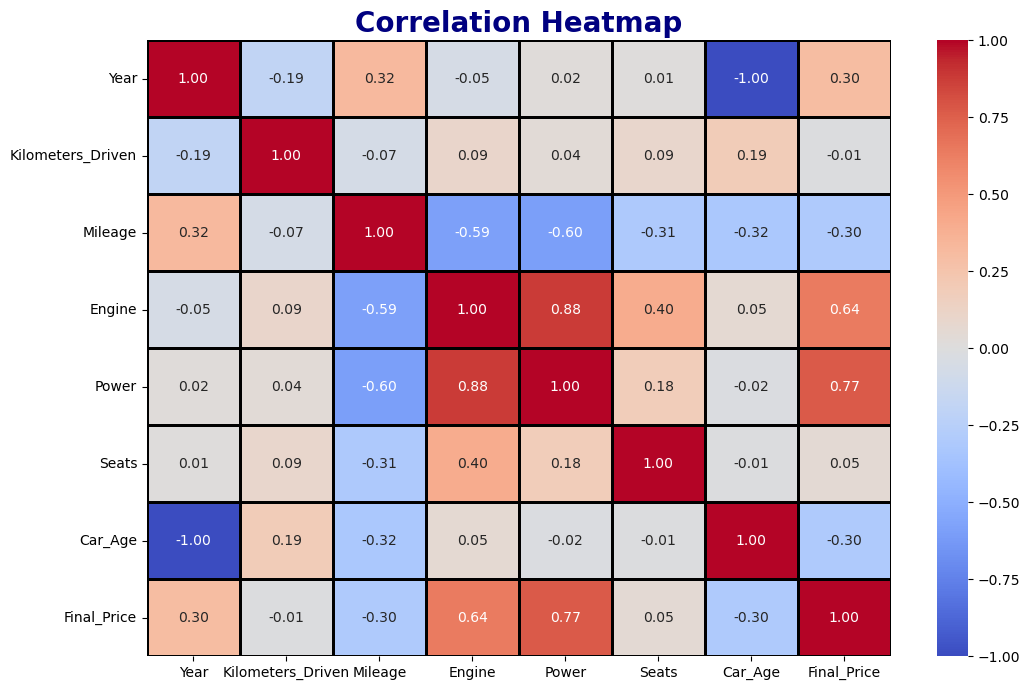

In [164]:
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, linewidth=1, linecolor='black')
plt.title('Correlation Heatmap', fontsize=20, color='navy', fontweight='bold')

plt.show()

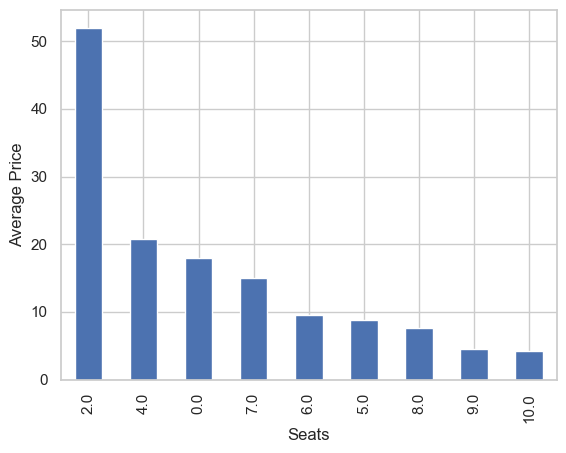

In [186]:
sns.set_theme(style='whitegrid')
df.groupby('Seats')['Final_Price'].mean().sort_values(ascending=False).plot.bar()
plt.xlabel('Seats')
plt.ylabel('Average Price')

plt.show()

In [182]:
categories = [
    ('Location', 'Location Vs Final Price', None),
    ('Transmission', 'Transmission Vs Final Price', None),
    ('Fuel_Type', 'Fuel_Type Vs Final Price', None),
    ('Owner_Type', 'Owner_Type Vs Final Price', None),
    ('Brand', 'Brand Vs Final Price', 10),
    ('Model', 'Model Vs Final Price', 10)
]

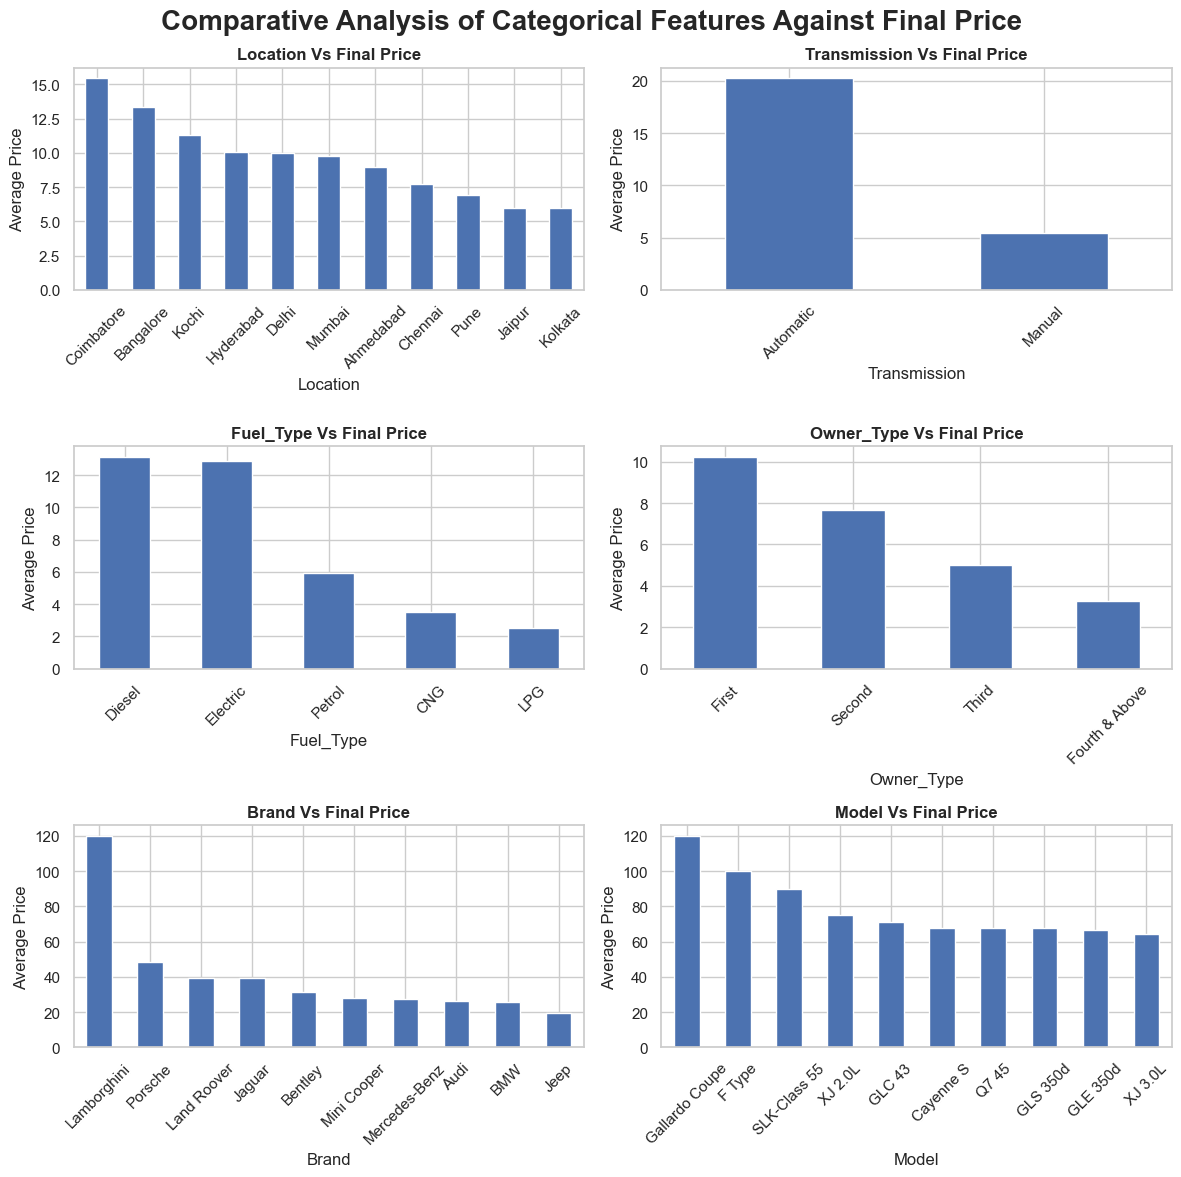

In [196]:
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()
plt.suptitle('Comparative Analysis of Categorical Features Against Final Price', fontsize=20, fontweight='bold')
for i, (category, title, top_n) in enumerate(categories):
    ax=axes[i]
    grouped_data = df.groupby(category)['Final_Price'].mean().sort_values(ascending=False)
    if top_n:
        grouped_data=grouped_data.head(top_n)
    grouped_data.plot.bar(ax=ax)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Price')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Through EDA, we got useful insights, and below are the factors influencing the price of the car and a few takeaways:

- Most customers prefer 2-seat cars; hence, the price of 2-seat cars is higher than that of other cars.
- The car's price decreases as the car's age increases.
- Customers prefer to purchase the first owner rather than the second or third.
- The customer prefers to purchase an electric vehicle due to increased fuel prices.
- Automatic transmission is easier than manual.

#### EDA Exploratory Data 

Exploratory Data Analysis refers to the crucial process of performing initial investigations on data to discover patterns to check assumptions with the help of summary statistics and graphical representations.

- EDA can be leveraged to check for outliers, patterns, and trends in the given data.
- EDA helps to find meaningful patterns in data.
- EDA provides in-depth insights into the data sets to solve our business problems.
- EDA gives a clue to impute missing values in the dataset

#### Unvariate Analysis

Univariate analysis is performed on both categorical and numerical variables to understand their individual distributions and characteristics.

- Categorical Variables: These can be visualized using count plots, bar charts, pie charts, etc., to show the frequency and distribution of different categories.

- Numerical Variables: For numerical variables, visualization techniques such as histograms, box plots, and density plots are used to reveal the distribution, skewness, and presence of outliers.

In our analysis, we have used histograms and box plots to explore continuous variables. These visualizations help identify patterns, skewness, and outliers within the data, providing insights into the distribution and variability of each variable."

#### Bivariate Analysis

Now, let’s move ahead with bivariate analysis. Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

- For Numerical variables, Pair plots and Scatter plots are widely been used to do Bivariate Analysis.

- A Stacked bar chart can be used for categorical variables if the output variable is a classifier. Bar plots can be used if the output variable is continuous

In our example, a pair plot has been used to show the relationship between two Categorical variables.

#### Handly Missing Values

In [199]:
df.isna().sum().sort_values(ascending=False)

Power                2789
Final_Price          1055
Seats                  53
Engine                 46
Mileage                 2
Model                   1
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Car_Age                 0
Brand                   0
dtype: int64

In [217]:
num_col

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'Car_Age', 'Final_Price'],
      dtype='object')

In [233]:
import warnings
warnings.filterwarnings('ignore')

In [235]:
# numeric
for col in num_col:
    if df[col].isna().sum() > 0:
        skewness = df[col].skew()
        if abs(skewness) > 1:
            fill_value = df[col].median()
        else:
            fill_value = df[col].mean()
        df[col].fillna(fill_value, inplace=True)
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Car_Age              0
Brand                0
Model                0
Final_Price          0
dtype: int64

In [221]:
# Categorical
for col in cat_col:
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [223]:
df['Brand'].mode()[0]

'Maruti'

In [231]:
df.isna().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Car_Age              0
Brand                0
Model                0
Final_Price          0
dtype: int64

#### Handle Outliers

In [247]:
Outliers = df[(df['Seats'] == 0) | (df['Kilometers_Driven'] >=2000000)]
Outliers

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Car_Age,Brand,Model,Final_Price
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,88.8,5.0,8,BMW,X5 xDrive,65.0
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.50,3197.0,88.8,0.0,13,Audi,A4 3.2,18.0


In [251]:
df.shape

(7253, 14)

In [249]:
df_new = df[(df['Seats'] != 0) & (df['Kilometers_Driven'] <=2000000)]

In [253]:
df_new.shape

(7251, 14)